In [ ]:
import pandas as pd
order_df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/order.csv")
# Summary  dari segi kuantitas, harga, freight value, dan weight
print(order_df.describe())
# Median median dari total pembelian konsumen per transaksi kolom price
print(order_df.loc[:, "price"].median())

           quantity         price  freight_value  product_weight_gram
count  49999.000000  4.999900e+04   49999.000000         49980.000000
mean       1.197484  2.607784e+06  104521.390428          2201.830892
std        0.722262  1.388312e+06   55179.844962          3929.896875
min        1.000000  2.000000e+05    9000.000000            50.000000
25%        1.000000  1.410500e+06   57000.000000           300.000000
50%        1.000000  2.610000e+06  104000.000000           800.000000
75%        1.000000  3.810000e+06  152000.000000          1850.000000
max       21.000000  5.000000e+06  200000.000000         40425.000000
2610000.0


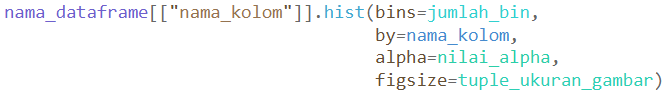

In [ ]:
from PIL import Image
img = Image.open('HISTOGRAM.png')
img

Beberapa atribut penting dalam histogram pandas:

*   bins = jumlah_bins dalam histogram yang akan digunakan. Jika tidak didefinisikan jumlah_bins, maka function akan secara default menentukan jumlah_bins sebanyak 10.
*   by = nama kolom di DataFrame untuk di group by. (valuenya berupa nama column di dataframe tersebut).

*   alpha = nilai_alpha untuk menentukan opacity dari plot di histogram. (value berupa range 0.0 - 1.0, dimana semakin kecil akan semakin kecil opacity nya)
*   figsize = tuple_ukuran_gambar yang digunakan untuk menentukan ukuran dari plot histogram. Contoh: figsize=(10,12)











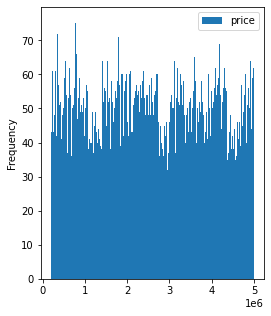

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
order_df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/order.csv")
# plot histogram kolom: price
order_df[['price']].plot.hist(figsize=(4, 5), bins=1000, xlabel=2, ylabel=2)
plt.show()  # Untuk menampilkan histogram plot

## Standar Deviasi dan Varians pada Pandas
Varians dan standar deviasi juga merupakan suatu ukuran dispersi atau variasi. Standar deviasi merupakan ukuran dispersi yang paling banyak dipakai. Hal ini mungkin karena standar deviasi mempunyai satuan ukuran yang sama dengan satuan ukuran data asalnya. Sedangkan varians memiliki satuan kuadrat dari data asalnya.

Contoh penggunaan pada dataframe nilai_skor_df:


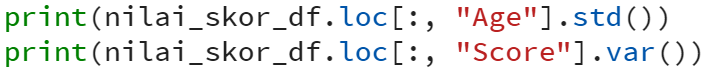

In [ ]:
img_1 = Image.open('std_var.png')
img_1

In [ ]:
import pandas as pd
order_df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/order.csv")
# Standar variasi kolom product_weight_gram
order_df.loc[:, "product_weight_gram"].std()
# Varians kolom product_weight_gram
order_df.loc[:, "product_weight_gram"].var()

15444089.451064402

## Menemukan Outliers Menggunakan Pandas
Outliers merupakan data observasi yang muncul dengan nilai-nilai ekstrim. Yang dimaksud dengan nilai-nilai ekstrim dalam observasi adalah nilai yang jauh atau beda sama sekali dengan sebagian besar nilai lain dalam kelompoknya.

Pada umumnya, outliers dapat ditentukan dengan metric IQR (interquartile range).

Rumus dasar dari IQR: Q3 - Q1. Dan data suatu observasi dapat dikatakan outliers jika memenuhi kedua syarat dibawah ini:

*   data < Q1 - 1.5 * IQR
*   data > Q3 + 1.5 * IQR

Contoh case: mengidentifikasi IQR dari dataframe nilai_skor_df




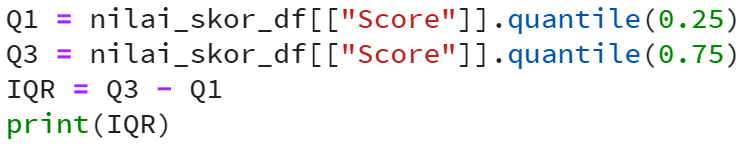

In [ ]:
img_2 = Image.open('outliers.png')
img_2

Karena saat ini memiliki skor IQR, saatnya untuk menentukan Outliers. Kode di bawah ini akan memberikan output dengan beberapa nilai True atau False. Titik data di mana terdapat False yang berarti nilai-nilai ini valid sedangkan True menunjukkan adanya Outliers.

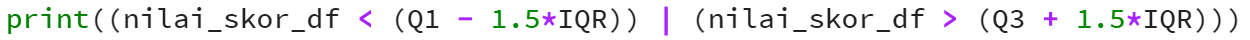

In [ ]:
img_3 = Image.open('outliers1.png')
img_3

Menghasilkan

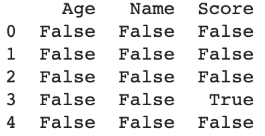

In [ ]:

img_4 = Image.open('hasil_outliers.png')
img_4

In [ ]:
import pandas as pd
order_df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/order.csv")
# Hitung quartile 1
Q1 = order_df[["product_weight_gram"]].quantile(0.25)
# Hitung quartile 3
Q3 = order_df[["product_weight_gram"]].quantile(0.75)
# Hitung inter quartile range dan cetak ke console
IQR = Q3 - Q1
print(IQR)

product_weight_gram    1550.0
dtype: float64


In [ ]:
print((order_df < (Q1 - 1.5 * IQR)) | (order_df > (Q3 + 1.5 * IQR)))

       customer_id  freight_value  order_id  ...  purchase_date  quantity  seller_id
0            False          False     False  ...          False     False      False
1            False          False     False  ...          False     False      False
2            False          False     False  ...          False     False      False
3            False          False     False  ...          False     False      False
4            False          False     False  ...          False     False      False
...            ...            ...       ...  ...            ...       ...        ...
49994        False          False     False  ...          False     False      False
49995        False          False     False  ...          False     False      False
49996        False          False     False  ...          False     False      False
49997        False          False     False  ...          False     False      False
49998        False          False     False  ...          False  

## .groupby menggunakan Pandas
Kegunaan .groupby adalah mencari summary dari data frame dengan menggunakan aggregate dari kolom tertentu.

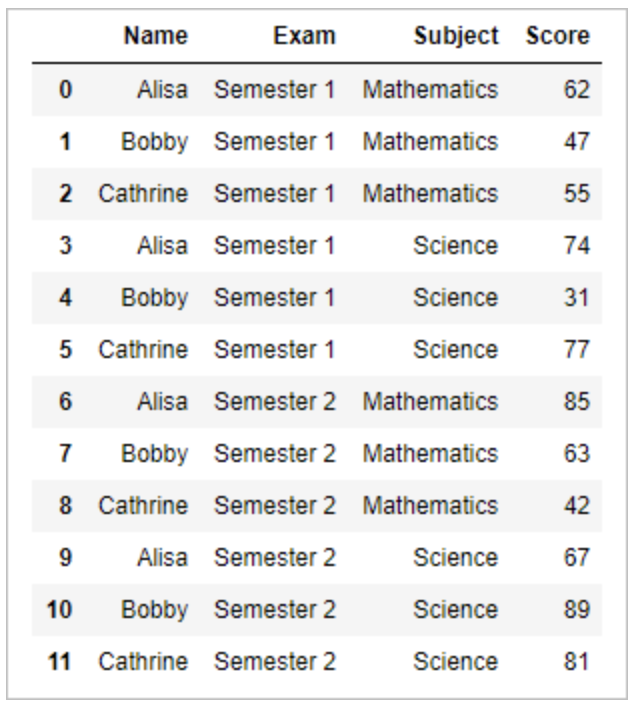

In [ ]:
img_5 = Image.open('contoh_data.png')
(img_5)

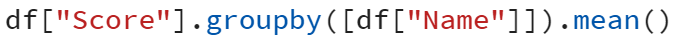

In [ ]:
img_6 = Image.open('code1.png')
(img_6)

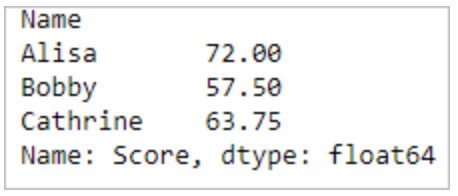

In [ ]:
img_7 = Image.open('output1.png')
(img_7)

Penjelasan: komputasi diatas menggunakan kolom ‘Name’ sebagai aggregate dan kemudian menggunakan menghitung mean dari kolom ‘Score’ pada tiap - tiap aggregate tersebut

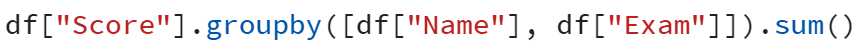

In [ ]:
img_8 = Image.open('code2.png')
img_8

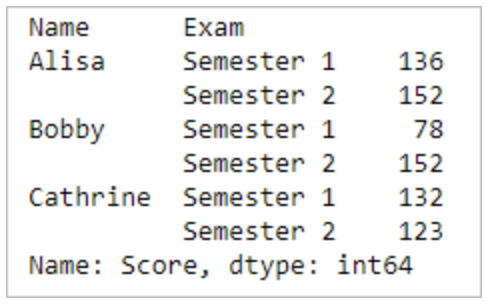

In [ ]:
img_8 = Image.open('output2.png')
img_8

Penjelasan: komputasi diatas menggunakan kolom ‘Name’ dan ‘Exam’ sebagai aggregate dan kemudian menggunakan menghitung sum dari kolom ‘Score’ pada tiap - tiap aggregate tersebut.

In [ ]:
import pandas as pd
order_df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/order.csv")
# Hitung rata rata dari price per payment_type
rata_rata = order_df["price"].groupby(order_df["payment_type"]).mean()
print(rata_rata)

payment_type
credit card        2.600706e+06
debit card         2.611974e+06
e-wallet           2.598562e+06
virtual account    2.619786e+06
Name: price, dtype: float64


## Sorting Menggunakan Pandas


In [ ]:
import pandas as pd
order_df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/order.csv")
# Hitung harga maksimum pembelian customer
sort_harga = order_df.sort_values(by="price", ascending=True)
print(sort_harga)

                               order_id  ...  product_weight_gram
11939  64619901c45fba79638d666058bf6be6  ...                200.0
42166  54220fcc516cabe9ec84b210c0765ef2  ...               1100.0
42452  9960ee97c2f8d801a200a01893b3942f  ...               6663.0
42025  36cdcd48e9697951eef9c32ef39dc9f3  ...                550.0
33786  0d9e86e02c1a823b20c03ea29d616607  ...               7550.0
...                                 ...  ...                  ...
3976   f343624eab419250ad81f1ce6be22c93  ...                950.0
21072  c8947a583ab9791a5a9d02384cb84302  ...                550.0
41958  2711089c7fec59d4dc8483e3c6a12fa3  ...                200.0
22618  a767765cf25c6fcfd8307499da9205d2  ...                200.0
47074  f6134169ca6f0cdfbe6458ebb5731613  ...              10600.0

[49999 rows x 12 columns]


## TUGAS


1.   Median price yang dibayar customer dari masing-masing metode pembayaran.
2.   Item daftar
3.   Tentukan metode pembayaran yang memiliki basket size (rataan median price) terbesar.
4. Ubah freight_value menjadi shipping_cost dan cari shipping_cost termahal dari data penjualan tersebut menggunakan sort.
5. Untuk product_category_name, berapa rata-rata weight produk tersebut dan standar deviasi mana yang terkecil dari weight tersebut,
6. Buat histogram quantity penjualan dari dataset tersebut untuk melihat persebaran quantity penjualan tersebut dengan bins = 5 dan figsize= (4,5)

payment_type
credit card        2587500
debit card         2621500
e-wallet           2589000
virtual account    2643000
Name: price, dtype: int64
                               order_id  ...  product_weight_gram
23829  7d63cb1d349e7bd0ee1edcc61ea71077  ...                400.0
12011  00c9f7d4b0e87781465e562dc109f6aa  ...                900.0
10984  69013d19f8db4cd7dc9f3b5c2564a96f  ...                250.0
29722  f32c4d2b078bc5a354f4c1184522b5ff  ...                450.0
15259  c8eab0ccabe8cdfc2afce66c1c554ae2  ...                100.0
...                                 ...  ...                  ...
2891   1d0e8770169496e47622b6cbc0d10bda  ...                900.0
36815  4bff82a994068f564e54b52b08ef4512  ...                150.0
8175   e6b1fa22555c3064f984ebeb8a88de77  ...                250.0
4034   8ac2728285fd4228f35d907768b5288a  ...               1700.0
32994  0286e258217733541e80588e29c208c1  ...                700.0

[49999 rows x 12 columns]
product_category_name
beauty      

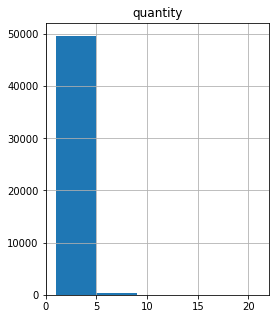

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
order_df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/order.csv")
# Median price yang dibayar customer dari masing-masing metode pembayaran.
median_price = order_df["price"].groupby(order_df["payment_type"]).median()
print(median_price)
# Ubah freight_value menjadi shipping_cost dan cari shipping_cost
# termahal dari data penjualan tersebut menggunakan sort.
order_df.rename(columns={"freight_value": "shipping_cost"}, inplace=True)
sort_value = order_df.sort_values(by="shipping_cost", ascending=0)
print(sort_value)
# Untuk product_category_name, berapa rata-rata weight produk tersebut
# dan standar deviasi mana yang terkecil dari weight tersebut,
mean_value = order_df["product_weight_gram"].groupby(order_df["product_category_name"]).mean()
print(mean_value.sort_values())
std_value = order_df["product_weight_gram"].groupby(order_df["product_category_name"]).std()
print(std_value.sort_values())
# Buat histogram quantity penjualan dari dataset tersebutuntuk melihat persebaran quantity
# penjualan tersebut dengan bins = 5 dan figsize= (4,5)
order_df[["quantity"]].hist(figsize=(4, 5), bins=5)
plt.show()